In [1]:
%pwd

'/Users/alexkim/Documents/GitHub/sales_data_analysis'

# 인사이트(중앙 편의점)
1. 소비 트랜드 만들기 
    - 고객별 총 소비량 감소
    - 누적 매출액 증가량 감소
    - 지역별, 소득수준 별 소비량 변화
    - 1 지역 고가품 소비 증가 경향
    - 5 지역 저가품 소비 증가 경향
       |지역|인구(명)|소득|컨셉|연령 분포|소비 집중 시간|
       |-|-|-|-|-|-|
       | 1지역 | 100 | 2억 | 부촌 | 고령남여 + 청년 | 일과 시간 소비 |
       | 2지역 | 150 | 1억 | 위성신도시 | 신혼 부부 + 어린 자녀 |  평일 오전, 주말 | 
       | 3지역 | 300 | 5천 | 업무지구 | 30~50대 생상가능인구 | 점심시간, 저녁, (특징: 주말 소비 급감) | 
       | 4지역 | 200 | 1천 | 대학가 | 20대 | 점심시간, 저녁, (특징: 주말 소비 급감) |
       | 5지역 | 250 | 3천 | 일반거주지구 | 노년층 | 늦은 밤 |
       
       -  소득은 정규분포로 데이터 입력
1. 트랜드 분석
    - 평균 1회 결제 금액이 큰 고객을 더 유치하기위한 마케팅 계획 수립을 위한 분석
    - 최근 변화한 소비 트렌드에 가장 민감하게 반응한 소득별 계층 분석

1. 데이터프레임
    - 상품 데이터프레임
>- product_num* : 상품 코드
>- price* : 상품 가격
>- price_grade : 고가 중가 저가 여부

    - 고객 데이터프레임
>- cusno* : 고객 번호
>- region* : 지역  
>- gender* : 성별  
>- age* : 나이  
>- income* : 급여  
>- grade_20 : 2020년 회원 등급
>- grade_21 : 2021년 회원 등급
>- ARPPU_20 : 2020년 회당 평균 결제액
>- ARPPU_21 : 2021년 회당 평균 결제액
>- AVC_20 : 2020년 연간 방문 횟수
>- AVC_21 : 2021년 연간 방문 횟수
>- purchase_trend : 고개 구매 추세 변화
    
    - 거래 데이터프레임
>- num_ts* : 거래 번호
>- cusno_ts* : 고객 변호
>- product_num_ts* : 상품코드
>- price_ts : 상품 가격
>- quantity* : 수량
>- amount : 해당 거래 매출
>- date*: 거래 날짜
>- year, weekday, hour : 거래 년도, 요일, 시간

 **변수명* <- 독립변수로 직접 입력해준 데이터**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import plotly.express as px
import seaborn as sns
import random
import warnings
from datetime import datetime
from dateutil.parser import parse
warnings.filterwarnings('ignore')

random.seed(0)
np.random.seed(0)

## 상품 목록 데이터프레임 만들기 : product

### 상품 목록 데이터프레임 양식 만들기

In [3]:
product = pd.DataFrame(columns=['product_num', 'price', 'price_grade'])
product

,product_num,price,price_grade


### 상품 목록 데이터프레임 데이터 채우기

#### 상품 코드 : product_num

In [4]:
product_num = np.arange(1, 101)
product.product_num = product_num

#### 상품 가격 : price

In [5]:
price = random.sample(list(range(1000, 100000)), 100)
product.price = price

### 상품 목록 데이터프레임 종속변수

#### 상품 가격 분류 : price_grade

In [6]:
# price_grade : 고가품 : 1, 중가품 : 2, 저가품 : 3

def price_grade(x):
    y = 0
    if x <= 20000:
        y = '3'
    elif x <= 50000:
        y = '2'
    else:
        y = '1'
    return y


product['price_grade'] = product['price'].apply(price_grade)
product

,product_num,price,price_grade
0,1,51494,1
1,2,56125,1
2,3,6306,3
3,4,34936,2
4,5,68013,1
...,...,...,...
95,96,25100,2
96,97,25823,2
97,98,25475,2
98,99,5321,3


## 거래 데이터 만들기 : purchase

### 거래 데이터프레임 만들기

#### 거래 데이터프레임 양식 만들기

In [7]:
purchase = pd.DataFrame(columns=['num_ts', 'cusno_ts', 'product_num_ts', 'price_ts',
                        'quantity', 'amount', 'date', 'year', 'weekday', 'hour'])
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour


### 거래 데이터프레임 데이터 채우기

#### 날짜,요일,시간 : date, day, time

In [8]:
# date
# date 간격 : 시간
date_list_20 = list(pd.date_range('2020-01-01', '2020-12-31', freq='H'))
date_list_21 = list(pd.date_range('2021-01-01', '2021-12-31', freq='H'))

# 2020 년 거래량 6000건
date_20 = np.random.choice(date_list_20, size=6000).tolist()
# 2021 년 거래량 4000건
date_21 = np.random.choice(date_list_21, size=4000).tolist()
date = date_20 + date_21
random.shuffle(date)
date = pd.Series(date)

#date 에서 년-월-일 형식의 날짜 추출
# purchase.date = date.dt.date
purchase.date = pd.to_datetime(date.dt.date)

# # year(년도)
purchase.year = date.dt.year

# # day(요일)
purchase.weekday = date.dt.weekday

# # 시간
purchase.hour = date.dt.hour

purchase=purchase.sort_values('date',ascending=True)
purchase=purchase.reset_index(drop=True)

purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour
0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,3
1,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,13
2,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,13
3,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,0
4,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,21
...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-30,2021,3,4
9996,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-30,2021,3,20
9997,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-30,2021,3,19
9998,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31,2021,4,0


#### 거래 번호 : num_ts

In [9]:
num_ts = np.arange(0, 10000)
purchase.num_ts = num_ts

#### 고객번호 : cusno_ts

In [10]:
# 기존 cusno가 중복될 수 있도록 만들기
cusno_ts = np.random.choice(list(np.arange(10000, 11000)), size=10000)
purchase.cusno_ts = cusno_ts

#### 상품코드 : product_num_ts

In [11]:
product_num_ts = np.random.choice(list(product_num), size=10000)
purchase.product_num_ts = product_num_ts

price_grade_1 = product[product['price_grade'] == '1'].product_num.tolist()
price_grade_2 = product[product['price_grade'] == '2'].product_num.tolist()
price_grade_3 = product[product['price_grade'] == '3'].product_num.tolist()
price_grade_3

price_grade_1_20 = np.random.choice(price_grade_1, 1000).tolist()
price_grade_2_20 = np.random.choice(price_grade_2, 2000).tolist()
price_grade_3_20 = np.random.choice(price_grade_3, 3000).tolist()
product_num_ts_20 = price_grade_1_20 + price_grade_2_20 + price_grade_3_20
random.shuffle(product_num_ts_20)
purchase[purchase['year'] == 2020].product_num_ts = product_num_ts_20

price_grade_1_21 = np.random.choice(price_grade_1, 2000).tolist()
price_grade_2_21 = np.random.choice(price_grade_2, 1000).tolist()
price_grade_3_21 = np.random.choice(price_grade_3, 1000).tolist()
product_num_ts_21 = price_grade_1_21 + price_grade_2_21 + price_grade_3_21
random.shuffle(product_num_ts_21)
purchase[purchase['year'] == 2021].product_num_ts = product_num_ts_21

#### 상품 가격 : price_ts

In [12]:
def price(x):
    price = product[product.product_num == x].price
    price = str(price).split()[1]
    return int(price)


purchase.price_ts = pd.Series(purchase.product_num_ts.map(price))
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour
0,0,10660,31,74375,NaN,NaN,2020-01-01,2020,2,3
1,1,10760,45,72919,NaN,NaN,2020-01-01,2020,2,13
2,2,10626,8,40755,NaN,NaN,2020-01-01,2020,2,13
3,3,10918,48,95333,NaN,NaN,2020-01-01,2020,2,0
4,4,10114,84,80060,NaN,NaN,2020-01-01,2020,2,21
...,...,...,...,...,...,...,...,...,...,...
9995,9995,10691,61,9255,NaN,NaN,2021-12-30,2021,3,4
9996,9996,10629,6,64691,NaN,NaN,2021-12-30,2021,3,20
9997,9997,10373,5,68013,NaN,NaN,2021-12-30,2021,3,19
9998,9998,10144,45,72919,NaN,NaN,2021-12-31,2021,4,0


#### 구매수량 : quantity

In [13]:
# 2020년 구매수량 데이터 생성
a_20 = np.random.randint(1, 4, size=4500).tolist()
b_20 = np.random.randint(4, 7, size=3500).tolist()
c_20 = np.random.randint(7, 10, size=2000).tolist()
li_20 = a_20+b_20+c_20
random.shuffle(li_20)
purchase.quantity[purchase.year == 2020] = li_20

# 2021년 구매수량 데이터 생성
a_21 = np.random.randint(1, 4, size=6500).tolist()
b_21 = np.random.randint(4, 7, size=2500).tolist()
c_21 = np.random.randint(7, 10, size=1000).tolist()
li_21 = a_21+b_21+c_21
random.shuffle(li_21)
purchase.quantity[purchase.year == 2021] = li_21
purchase = purchase.astype({'quantity':'int'})
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   cusno_ts        10000 non-null  int64         
 2   product_num_ts  10000 non-null  int64         
 3   price_ts        10000 non-null  int64         
 4   quantity        10000 non-null  int64         
 5   amount          0 non-null      object        
 6   date            10000 non-null  datetime64[ns]
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 781.4+ KB


### 거래 데이터프레임 종속변수

#### 거래별 거래총액 : amount

In [14]:
def price(x):
    price = product[product.product_num == x].price
    price = str(price).split()[1]
    return int(price)


purchase.amount = pd.Series(
    purchase.product_num_ts.map(price))*purchase.quantity
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   cusno_ts        10000 non-null  int64         
 2   product_num_ts  10000 non-null  int64         
 3   price_ts        10000 non-null  int64         
 4   quantity        10000 non-null  int64         
 5   amount          10000 non-null  int64         
 6   date            10000 non-null  datetime64[ns]
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 781.4 KB


## 고객 데이터프레임 만들기 : customer

### 고객 데이터프레임 양식 만들기

In [15]:
customer = pd.DataFrame(columns=['cusno', 'region', 'gender', 'age',  'income', 'grade_20',
                        'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend'])
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend


### 고객 데이터프레임 데이터 채우기

#### 고객 번호 : cusno

In [16]:
cusno = np.arange(10000, 11000)
customer.cusno = cusno

#### 거주 지역 : region

In [17]:
# 지역별 인구 분포 산정
area_1 = np.random.randint(1, 2, size=100).tolist()
area_2 = np.random.randint(2, 3, size=150).tolist()
area_3 = np.random.randint(3, 4, size=300).tolist()
area_4 = np.random.randint(4, 5, size=200).tolist()
area_5 = np.random.randint(5, 6, size=250).tolist()
li = area_1+area_2+area_3+area_4+area_5
random.shuffle(li)

customer.region = li

#### 소득 : income

In [18]:
# 지역별 소득 분포 산정 : 정규분포 사용
customer.income[customer.region == 1] = np.random.normal(10, 3, 100)*20000
customer.income[customer.region == 2] = np.random.normal(10, 2, 150)*10000
customer.income[customer.region == 3] = np.random.normal(10, 1, 300)*5000
customer.income[customer.region == 4] = np.random.normal(10, 2, 200)*1000
customer.income[customer.region == 5] = np.random.normal(10, 0.5, 250)*3000
customer.income = customer.income.map(lambda x: int(x))

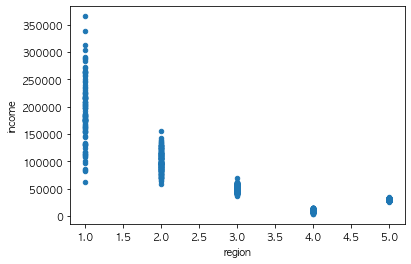

In [19]:
# 지역별 연봉 분포
customer.plot(x='region', y='income', kind='scatter');

##### 지역별 소득 값 중 이상치 보정

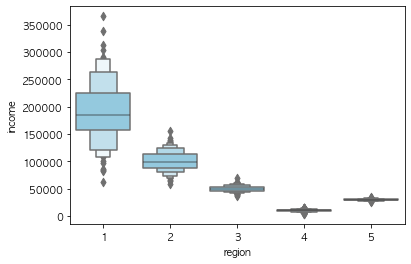

In [20]:
# 지역에 따른 소득 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='income', data=customer, color='skyblue');

In [21]:
# 소득 컬럼의 통계 요약
customer.describe()

,cusno,region,income
count,1000.000000,1000.000000,1000.000000
mean,10499.500000,3.350000,59024.151000
std,288.819436,1.276373,56426.615309
min,10000.000000,1.000000,3690.000000
25%,10249.750000,2.750000,28702.500000
50%,10499.500000,3.000000,45247.000000
75%,10749.250000,4.250000,62496.500000
max,10999.000000,5.000000,365661.000000


In [22]:
# 고객 소득 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    # 사분위 수(quartile)
    Q1 = cus_info["income"]["25%"]
    Q3 = cus_info["income"]["75%"]
    # 사분위간 범위(Interquartile range, IQR)
    IQR = Q3 - Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].income <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].income >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].income
    print(outlier, '\n')

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
54     338795
366    365661
Name: income, dtype: int64 

2지역 이상치
387    155373
Name: income, dtype: int64 

3지역 이상치
698    70146
Name: income, dtype: int64 

4지역 이상치
276     3690
370    15215
490     4747
755     4286
Name: income, dtype: int64 

5지역 이상치
Series([], Name: income, dtype: int64) 



#### 연령 : age

##### 지역별 연령 데이터 산정

In [23]:
# 1 지역 연령 데이터 생성
age_1_old = np.random.normal(65, 6, 60).tolist()
age_1_young = np.random.normal(24, 3, 40).tolist()
age_1 = age_1_old + age_1_young
customer.age[customer.region == 1] = age_1

# 2 지역 연령 데이터 생성
age_2_old = np.random.normal(40, 3, 100).tolist()
age_2_young = np.random.normal(5, 3, 50).tolist()
age_2 = age_2_old + age_2_young
customer.age[customer.region == 2] = age_2

# # 3 지역 연령 데이터 생성
age_3 = np.random.randint(23, 57, size=300).tolist()
customer.age[customer.region == 3] = age_3

# # 4 지역 연령 데이터 생성
age_4 = np.random.randint(20, 28, size=200).tolist()
customer.age[customer.region == 4] = age_4

# # 5 지역 연령 데이터 생성
age_5 = np.random.randint(50, 85, size=250).tolist()
customer.age[customer.region == 5] = age_5

customer.age = customer.age.map(lambda x: int(x))

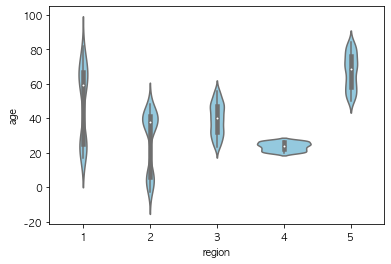

In [24]:
# 지역별 나이 분포
x = customer.region
y = customer.age
sns.violinplot(x,y,data=product, color='skyblue');

##### 지역별 연령 중 이상치 보정

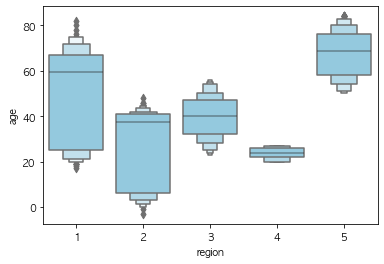

In [25]:
# 지역에 따른 연령 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='age', data=customer, color='skyblue');

In [26]:
# 고객 연령 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    # 사분위 수(quartile)
    Q1 = cus_info["age"]["25%"]
    Q3 = cus_info["age"]["75%"]
    # 사분위간 범위(Interquartile range, IQR)
    IQR = Q3-Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].age <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].age >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].age
    print(outlier)

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정
# 1지역: 0개
# 2지역: 0개
# 3지역: 0개
# 4지역: 0개
# 5지역: 0개

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
Series([], Name: age, dtype: int64)
2지역 이상치
Series([], Name: age, dtype: int64)
3지역 이상치
Series([], Name: age, dtype: int64)
4지역 이상치
Series([], Name: age, dtype: int64)
5지역 이상치
Series([], Name: age, dtype: int64)


In [27]:
# 추가 이상치 검증 : 나이가 음수인 이상치 확인
grouped = customer.groupby('region').age
for i, j in grouped:
    print(i)
    print(j.value_counts().sort_index())

1
17    1
18    1
19    4
20    2
21    5
22    2
23    6
24    1
25    7
26    3
27    1
28    5
29    2
49    1
52    1
54    2
55    1
56    1
58    2
59    2
60    3
61    2
62    7
63    3
64    2
65    3
66    4
67    3
68    3
69    6
71    1
72    3
73    2
74    1
75    3
76    1
78    1
80    1
82    1
Name: age, dtype: int64
2
-3      1
-1      1
 0      5
 1      3
 2      5
 3      7
 4      4
 5      9
 6      5
 7      2
 8      6
 9      1
 10     1
 33     1
 34     2
 35     6
 36     6
 37    10
 38    13
 39    13
 40     8
 41    11
 42    13
 43     7
 44     5
 45     2
 46     2
 48     1
Name: age, dtype: int64
3
23     7
24     6
25    10
26     5
27     4
28    12
29     6
30    12
31    12
32    10
33    10
34    11
35     7
36     8
37     6
38    13
39     7
40    15
41     8
42     8
43     9
44     9
45     9
46    11
47    14
48    13
49    12
50     9
51     5
52     7
53     4
54     5
55     9
56     7
Name: age, dtype: int64
4
20    27
21    21
22  

In [28]:
# 추가 이상치 검증 : 나이가 음수인 이상치를 절대값을 이용하여 유효한 값으로 보정
customer[customer.age <= 0] = abs(customer[customer.age <= 0])
customer.age.value_counts().sort_index()

0      5
1      4
2      5
3      8
4      4
      ..
80     7
81     4
82     8
83    10
84     7
Name: age, Length: 79, dtype: int64

#### 성별 : gender

##### 지역별 성별 데이터 산정

In [29]:
# 1 지역 성별 데이터 생성
gender_1_male = np.random.randint(0, 1, size=40).tolist()
gender_1_female = np.random.randint(1, 2, size=60).tolist()
gender_1 = gender_1_male + gender_1_female
random.shuffle(gender_1)
customer.gender[customer.region == 1] = gender_1

# 2 지역 성별 데이터 생성
gender_2 = np.random.randint(0, 2, size=150)
customer.gender[customer.region == 2] = gender_2

# 3 지역 성별 데이터 생성
gender_3 = np.random.randint(0, 2, size=300)
customer.gender[customer.region == 3] = gender_3

# 4 지역 성별 데이터 생성
gender_4 = np.random.randint(0, 2, size=200)
customer.gender[customer.region == 4] = gender_4

# 5 지역 성별 데이터 생성
gender_5 = np.random.randint(0, 2, size=250)
customer.gender[customer.region == 5] = gender_5

customer.gender = customer.gender.map(lambda x: int(x))
gender_count = customer.gender.value_counts().sort_index()

print(f'남성 : {gender_count[0]}명\n여성 : {gender_count[1]}명')

남성 : 481명
여성 : 519명


### 고객 데이터프레임 종속변수

#### 년도별 고객별 연간 매출액 : ASC_20, ASC_21

In [30]:
li_2020 = []
li_2021 = []
for i in range(10000, 11000):
    a = purchase[(purchase['cusno_ts'] == i) & (
        purchase["year"] == 2020)].amount.sum()
    b = purchase[(purchase['cusno_ts'] == i) & (
        purchase["year"] == 2021)].amount.sum()

    li_2020.append(a)
    li_2021.append(b)

customer.ASC_20 = li_2020
customer.ASC_21 = li_2021

#### 년도별 고객 등급 : grade_20, grade_21

In [31]:
# 고객 등급 선정
# 3가지 등급, 인원수 1:1:1 비율로 선정
grade_20_Silver = customer.sort_values('ASC_20').ASC_20.iloc[333]
grade_20_Gold = customer.sort_values('ASC_20').ASC_20.iloc[666]
grade_20_VIP = customer.sort_values('ASC_20').ASC_20.iloc[999]

grade_21_Silver = customer.sort_values('ASC_21').ASC_21.iloc[333]
grade_21_Gold = customer.sort_values('ASC_21').ASC_21.iloc[666]
grade_21_VIP = customer.sort_values('ASC_21').ASC_21.iloc[999]

bin_dividers_20 = [0,grade_20_Silver,grade_20_Gold,grade_20_VIP]
bin_dividers_21 = [0,grade_21_Silver,grade_21_Gold,grade_21_VIP]

bin_names = ['Silver', 'Gold', 'VIP']  # qcut
customer['grade_20'] = pd.cut(x=customer.ASC_20,  # 데이터 배열
                              bins=bin_dividers_20,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부
bin_names = ['Silver', 'Gold', 'VIP']
customer['grade_21'] = pd.cut(x=customer.ASC_21,  # 데이터 배열
                              bins=bin_dividers_21 ,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부


#### 년도별 고객별 연간 방문 횟수 : AVC_20, AVC_21

In [32]:
li_2020 = []
li_2021 = []
for i in range(10000, 11000):
    a = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2020)]
    li_2020.append(len(a))
    a = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2021)]
    li_2021.append(len(a))

customer.AVC_20 = li_2020
customer.AVC_21 = li_2021

#### 년도별 고객별 회당 평균 결제액(Average Revenue Per Paid User) : ARPPU_20, ARPPU_21

In [33]:
customer.ARPPU_20 = (customer.ASC_20 / customer.AVC_20).round()
customer.ARPPU_21 = (customer.ASC_21 / customer.AVC_21).round()

#### 고객별 구매 추세 변화 : purchase_trend

In [34]:
customer.purchase_trend = np.where(customer.ASC_21 > customer.ASC_20, 1,0)
customer.head()

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,0,30,57910,VIP,Gold,292389.0,153603.0,9,4,2631500,614411,0
1,10001,2,1,36,115808,Silver,Silver,52148.0,103070.0,3,3,156444,309211,1
2,10002,4,1,26,9770,Gold,VIP,459348.0,156687.0,3,7,1378044,1096812,0
3,10003,2,0,42,125223,Gold,Silver,271016.0,118062.0,5,1,1355078,118062,0
4,10004,4,0,22,10505,VIP,Silver,333410.0,99797.0,6,2,2000463,199594,0


## DataFrame 확인

### 결측치 처리

In [35]:
customer.isnull().sum()

cusno              0
region             0
gender             0
age                0
income             0
grade_20           0
grade_21           0
ARPPU_20           1
ARPPU_21          15
AVC_20             0
AVC_21             0
ASC_20             0
ASC_21             0
purchase_trend     0
dtype: int64

In [36]:
customer.ARPPU_20.fillna(0, inplace=True)
customer.ARPPU_21.fillna(0, inplace=True)
customer.isnull().sum()

cusno             0
region            0
gender            0
age               0
income            0
grade_20          0
grade_21          0
ARPPU_20          0
ARPPU_21          0
AVC_20            0
AVC_21            0
ASC_20            0
ASC_21            0
purchase_trend    0
dtype: int64

In [37]:
product

,product_num,price,price_grade
0,1,51494,1
1,2,56125,1
2,3,6306,3
3,4,34936,2
4,5,68013,1
...,...,...,...
95,96,25100,2
96,97,25823,2
97,98,25475,2
98,99,5321,3


In [38]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_num  100 non-null    int64 
 1   price        100 non-null    int64 
 2   price_grade  100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [39]:
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour
0,0,10660,31,74375,5,371875,2020-01-01,2020,2,3
1,1,10760,45,72919,4,291676,2020-01-01,2020,2,13
2,2,10626,8,40755,6,244530,2020-01-01,2020,2,13
3,3,10918,48,95333,1,95333,2020-01-01,2020,2,0
4,4,10114,84,80060,3,240180,2020-01-01,2020,2,21
...,...,...,...,...,...,...,...,...,...,...
9995,9995,10691,61,9255,1,9255,2021-12-30,2021,3,4
9996,9996,10629,6,64691,4,258764,2021-12-30,2021,3,20
9997,9997,10373,5,68013,1,68013,2021-12-30,2021,3,19
9998,9998,10144,45,72919,2,145838,2021-12-31,2021,4,0


In [40]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   cusno_ts        10000 non-null  int64         
 2   product_num_ts  10000 non-null  int64         
 3   price_ts        10000 non-null  int64         
 4   quantity        10000 non-null  int64         
 5   amount          10000 non-null  int64         
 6   date            10000 non-null  datetime64[ns]
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 781.4 KB


In [41]:
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,0,30,57910,VIP,Gold,292389.0,153603.0,9,4,2631500,614411,0
1,10001,2,1,36,115808,Silver,Silver,52148.0,103070.0,3,3,156444,309211,1
2,10002,4,1,26,9770,Gold,VIP,459348.0,156687.0,3,7,1378044,1096812,0
3,10003,2,0,42,125223,Gold,Silver,271016.0,118062.0,5,1,1355078,118062,0
4,10004,4,0,22,10505,VIP,Silver,333410.0,99797.0,6,2,2000463,199594,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,3,1,25,49379,Gold,Gold,189141.0,170720.0,6,4,1134844,682880,0
996,10996,3,1,33,52317,VIP,VIP,399410.0,190914.0,6,6,2396457,1145486,0
997,10997,5,1,56,29752,Gold,Gold,185212.0,215428.0,8,2,1481698,430856,0
998,10998,4,0,26,11114,Silver,Silver,175425.0,51494.0,5,1,877126,51494,0


In [42]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   cusno           1000 non-null   int64   
 1   region          1000 non-null   int64   
 2   gender          1000 non-null   int64   
 3   age             1000 non-null   int64   
 4   income          1000 non-null   int64   
 5   grade_20        1000 non-null   category
 6   grade_21        1000 non-null   category
 7   ARPPU_20        1000 non-null   float64 
 8   ARPPU_21        1000 non-null   float64 
 9   AVC_20          1000 non-null   int64   
 10  AVC_21          1000 non-null   int64   
 11  ASC_20          1000 non-null   int64   
 12  ASC_21          1000 non-null   int64   
 13  purchase_trend  1000 non-null   int64   
dtypes: category(2), float64(2), int64(10)
memory usage: 96.1 KB


# 데이터 분석 및 시각화

## 데이터프레임 Merge

In [43]:
# Merge purchase and customer
df = purchase.merge(customer, how='left', left_on='cusno_ts', right_on='cusno', left_index=False,
                    right_index=False, sort=False, suffixes=('_ts', '_c'), copy=True, indicator=False, validate=None)

# Merge additional product
df = df.merge(product, how='left', left_on='product_num_ts',
              right_on='product_num', suffixes=('', '_p'), copy=True, indicator=False,)
df

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour,...,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend,product_num,price,price_grade
0,0,10660,31,74375,5,371875,2020-01-01,2020,2,3,...,238911.0,233624.0,9,4,2150203,934497,0,31,74375,1
1,1,10760,45,72919,4,291676,2020-01-01,2020,2,13,...,144799.0,263947.0,4,5,579197,1319733,1,45,72919,1
2,2,10626,8,40755,6,244530,2020-01-01,2020,2,13,...,134545.0,245054.0,10,4,1345449,980215,0,8,40755,2
3,3,10918,48,95333,1,95333,2020-01-01,2020,2,0,...,145561.0,74090.0,7,3,1018930,222270,0,48,95333,1
4,4,10114,84,80060,3,240180,2020-01-01,2020,2,21,...,128118.0,101434.0,5,5,640589,507172,0,84,80060,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,10691,61,9255,1,9255,2021-12-30,2021,3,4,...,310292.0,241538.0,5,4,1551462,966154,0,61,9255,3
9996,9996,10629,6,64691,4,258764,2021-12-30,2021,3,20,...,360681.0,251636.0,8,7,2885450,1761455,0,6,64691,1
9997,9997,10373,5,68013,1,68013,2021-12-30,2021,3,19,...,329332.0,241180.0,8,6,2634656,1447079,0,5,68013,1
9998,9998,10144,45,72919,2,145838,2021-12-31,2021,4,0,...,368460.0,318590.0,4,4,1473842,1274362,0,45,72919,1


In [44]:
# 중복을 제외하고 데이터 분석에 사용할 컬럼들로 이루어진 DataFrame 생성
df = df.loc[:, ['num_ts', 'date', 'product_num', 'price', 'price_grade', 'quantity', 'amount',
                'year', 'weekday', 'hour', 'cusno', 'region', 'gender', 'age', 'income',
                'grade_20', 'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend']]
df

,num_ts,date,product_num,price,price_grade,quantity,amount,year,weekday,hour,...,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,0,2020-01-01,31,74375,1,5,371875,2020,2,3,...,29703,VIP,VIP,238911.0,233624.0,9,4,2150203,934497,0
1,1,2020-01-01,45,72919,1,4,291676,2020,2,13,...,10736,Silver,VIP,144799.0,263947.0,4,5,579197,1319733,1
2,2,2020-01-01,8,40755,2,6,244530,2020,2,13,...,215286,Gold,VIP,134545.0,245054.0,10,4,1345449,980215,0
3,3,2020-01-01,48,95333,1,1,95333,2020,2,0,...,10782,Gold,Silver,145561.0,74090.0,7,3,1018930,222270,0
4,4,2020-01-01,84,80060,1,3,240180,2020,2,21,...,11218,Silver,Gold,128118.0,101434.0,5,5,640589,507172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2021-12-30,61,9255,3,1,9255,2021,3,4,...,7518,VIP,VIP,310292.0,241538.0,5,4,1551462,966154,0
9996,9996,2021-12-30,6,64691,1,4,258764,2021,3,20,...,49801,VIP,VIP,360681.0,251636.0,8,7,2885450,1761455,0
9997,9997,2021-12-30,5,68013,1,1,68013,2021,3,19,...,46418,VIP,VIP,329332.0,241180.0,8,6,2634656,1447079,0
9998,9998,2021-12-31,45,72919,1,2,145838,2021,4,0,...,52499,Gold,VIP,368460.0,318590.0,4,4,1473842,1274362,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   date            10000 non-null  datetime64[ns]
 2   product_num     10000 non-null  int64         
 3   price           10000 non-null  int64         
 4   price_grade     10000 non-null  object        
 5   quantity        10000 non-null  int64         
 6   amount          10000 non-null  int64         
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
 10  cusno           10000 non-null  int64         
 11  region          10000 non-null  int64         
 12  gender          10000 non-null  int64         
 13  age             10000 non-null  int64         
 14  income          10000 non-null  int64         
 15  gra

## 의도한 데이터 경향성 확인
- 고객별 총 소비량 감소
- 누적 매출액 증가량 감소
- 지역별, 소득수준 별 소비량 변화
- 1 지역 고가품 소비 증가 경향
    - 집에서 즐길 수 있는 고가품들 (와인, 치즈 밀키트 등...)
- 5 지역 저가품 소비 증가 경향


### 고객별 총 소비량 감소

1    228
0    772
Name: purchase_trend, dtype: int64


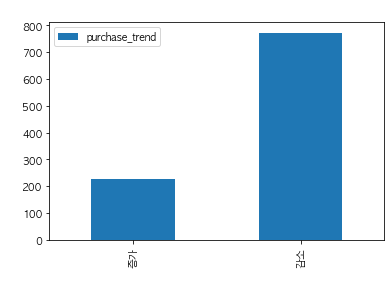

2020년 대비 2021년도 고객별 총 소비량이
 증가 228 명
 감소 772 명
으로 77.2% 고객들의 소비가 감소한 것으로 나타났다. 


In [46]:
a = customer.purchase_trend.value_counts()
a = a[::-1]
print(a)
a = a.rename(index={True: '증가', False: '감소'})
a.plot(kind='bar')
plt.title('2020년 대비 2021년도 고객별 평균 소비량 변화', color='white')
plt.xlabel('purchase_trend', color='white')
plt.ylabel('고객 수', color='white')
plt.legend()
plt.show()

print(f'2020년 대비 2021년도 고객별 총 소비량이\n 증가 {a[0]} 명\n 감소 {a[1]} 명\n으로 {a[1]/(10)}% 고객들의 소비가 감소한 것으로 나타났다. ')

###  누적 매출액 증가량 감소

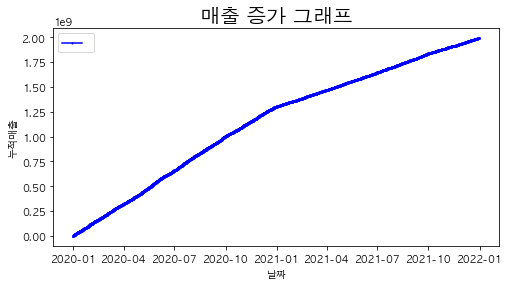

In [47]:
# 매출 증가 그래프
x = purchase.date
y = purchase.amount.cumsum()

plt.figure(figsize=(8,4))
plt.plot(x,y,color='blue',marker='o',markersize=1)
plt.title('매출 증가 그래프',size=20)
plt.xlabel('날짜',size=10)
plt.ylabel('누적매출',size=10)
plt.legend(labels=[''])
plt.show()

In [51]:
df.columns

Index(['num_ts', 'date', 'product_num', 'price', 'price_grade', 'quantity',
       'amount', 'year', 'weekday', 'hour', 'cusno', 'region', 'gender', 'age',
       'income', 'grade_20', 'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20',
       'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend'],
      dtype='object')

### 지역별 소비량 변화

In [91]:
table = df.pivot_table(index=['region'],values=['purchase_trend'],aggfunc='mean')
table

,purchase_trend
region,
1,0.193707
2,0.153741
3,0.216163
4,0.201435
5,0.259333


### 연도,지역별 고가품 소비 증감 현황

In [99]:
df.columns

Index(['num_ts', 'date', 'product_num', 'price', 'price_grade', 'quantity',
       'amount', 'year', 'weekday', 'hour', 'cusno', 'region', 'gender', 'age',
       'income', 'grade_20', 'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20',
       'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend'],
      dtype='object')

In [101]:
mask = (df.price_grade=='1')&(df.year==2020)&(df.region==1)
df.loc[mask].head()

,num_ts,date,product_num,price,price_grade,quantity,amount,year,weekday,hour,...,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
119,119,2020-01-07,2,56125,1,7,392875,2020,1,19,...,196999,VIP,VIP,194759.0,352166.0,12,4,2337112,1408665,0
126,126,2020-01-07,26,96660,1,5,483300,2020,1,1,...,205285,VIP,Gold,270137.0,240629.0,6,2,1620820,481258,0
145,145,2020-01-09,7,54075,1,3,162225,2020,3,8,...,196999,VIP,VIP,194759.0,352166.0,12,4,2337112,1408665,0
204,204,2020-01-13,21,93428,1,5,467140,2020,0,18,...,124661,VIP,Silver,432950.0,43692.0,4,2,1731802,87385,0
210,210,2020-01-13,58,96719,1,4,386876,2020,0,15,...,164071,VIP,Gold,187792.0,138959.0,9,5,1690130,694793,0


<AxesSubplot:xlabel='year,price_grade'>

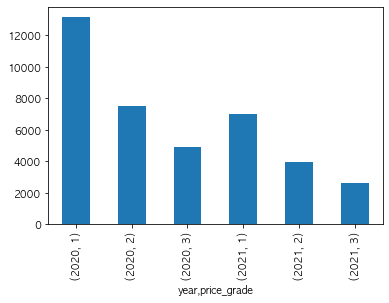

In [128]:
grouped = df.groupby(['year','price_grade'])
grouped.quantity.sum().plot(kind='bar')

In [152]:
grouped.quantity.sum()[2020]/grouped.quantity.sum()[2020].sum()

price_grade
1    0.514106
2    0.294389
3    0.191505
Name: quantity, dtype: float64

price_grade
1    0.517274
2    0.290166
3    0.192560
Name: quantity, dtype: float64

## 분석 결과 알 수 있는 정보

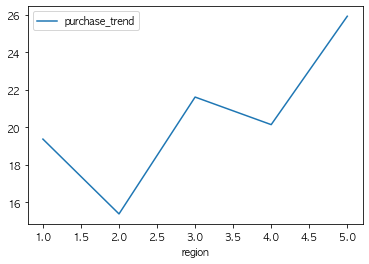

In [94]:
table = df.pivot_table(index=['region'],values=['purchase_trend'],aggfunc=lambda x:np.mean(x*100))
table.plot();

# 최근 경기변화에 가장 민감하게 반응하여 소비량이 떨어진 지역은 2지역임을 알수있음.
# 2지역은 본래 앵갤지수가 낮은 지역임을 알 수 있었다. 
# (앵갤지수 : 가계지출 대비 식료품 비율, 높은 수록 서민층)

# 필수소비재 위주로 소비를 하는 5지역은 최근 경기변화에도 다른지역에 비해 소비성향의 변화가 적었다.

In [ ]:
# grid = sns.FacetGrid(purchase, row='year', col='day', height=2.2, aspect=1.6)
# grid.map(plt.hist, 'amount', alpha=.5, bins=20)
# grid.add_legend()

In [ ]:
grid = sns.FacetGrid(X_train, row='embarked',
                     col='survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'sex', 'fare', alpha=.5,
         ci=None, order=["male", "female"])

grid.add_legend()

In [ ]:
grid = sns.FacetGrid(X_train, row='embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep',
         order=[1, 2, 3], hue_order=["male", "female"])

grid.add_legend()

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속 변수 분리
X = df_1[['gender_c', 'age_c', 'region_c', 'ARPPU_20_c',
          'AVC_20_c', 'AVC_21_c', 'amount_20_p']]
y = df_1['sales_trend']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)